In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

%matplotlib inline

# Credit risk dataset

In [2]:
df = pd.read_csv("../data/credit_risk.csv")
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
# Посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
label     1125 non-null int64
id        1125 non-null int64
fea_1     1125 non-null int64
fea_2     976 non-null float64
fea_3     1125 non-null int64
fea_4     1125 non-null float64
fea_5     1125 non-null int64
fea_6     1125 non-null int64
fea_7     1125 non-null int64
fea_8     1125 non-null int64
fea_9     1125 non-null int64
fea_10    1125 non-null int64
fea_11    1125 non-null float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [4]:
# Выведем информацию о распределениях признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [5]:
# Убедимся, что в данных отсутствуют пропущенные значения
print(df.isnull().any())

label     False
id        False
fea_1     False
fea_2      True
fea_3     False
fea_4     False
fea_5     False
fea_6     False
fea_7     False
fea_8     False
fea_9     False
fea_10    False
fea_11    False
dtype: bool


In [6]:
# Давайте заполним пропущенные значения
df['fea_2'].fillna(df['fea_2'].mean(), inplace=True)
print(df.isnull().any())

label     False
id        False
fea_1     False
fea_2     False
fea_3     False
fea_4     False
fea_5     False
fea_6     False
fea_7     False
fea_8     False
fea_9     False
fea_10    False
fea_11    False
dtype: bool


In [7]:
# Избавимся от ID, который не несет в себе никакого смысла
df.drop('id',  axis=1, inplace=True)

In [8]:
df.columns

Index(['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [9]:
categorical_cols = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
numerical_cols = ['fea_2', 'fea_4', 'fea_8', 'fea_10', 'fea_11']

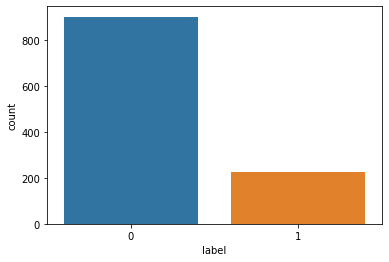

In [10]:
# Посмотрим на распределение целевого признака
sns.countplot(df['label'])
plt.show()

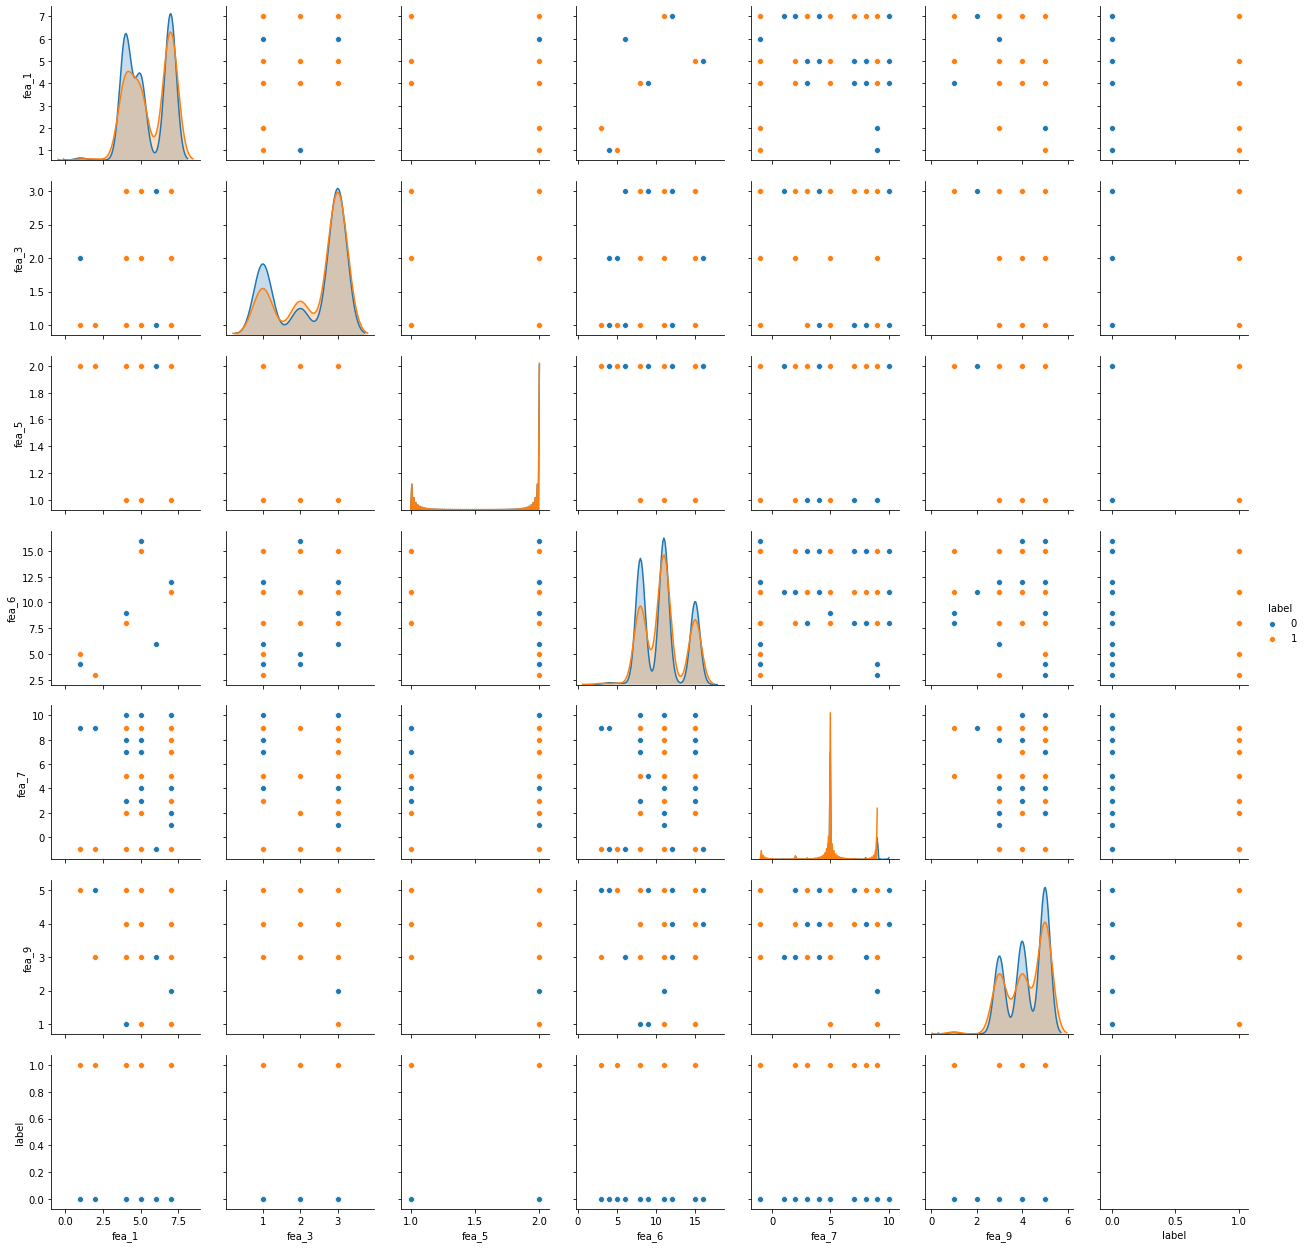

In [11]:
# Посмотрим на распределения категориальных признаков
sns.pairplot(df[categorical_cols + ['label']], hue='label')
plt.show()

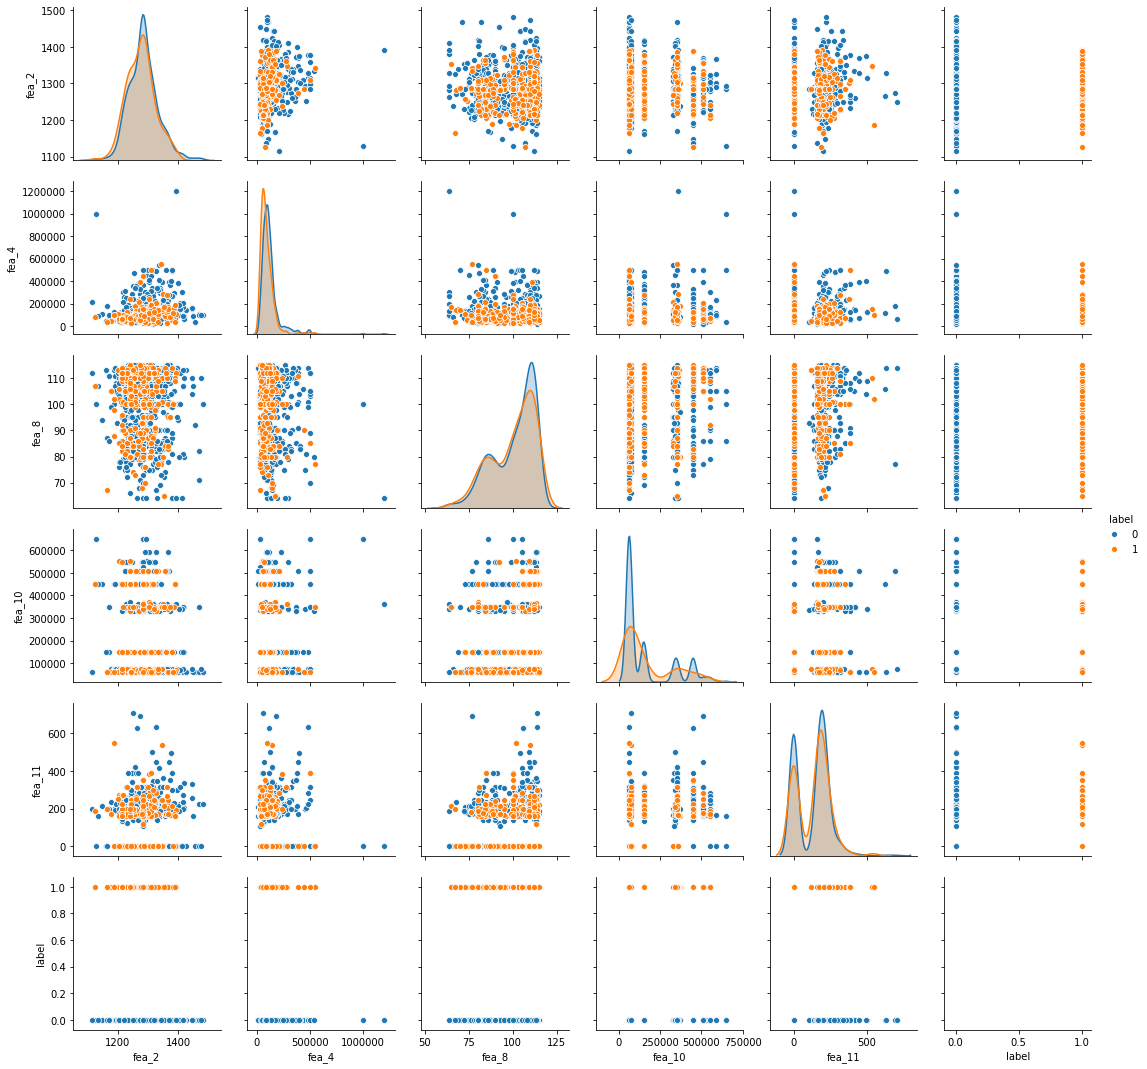

In [12]:
# Посмотрим на распределения числовых признаков
sns.pairplot(df[numerical_cols + ['label']], hue='label')
plt.show()

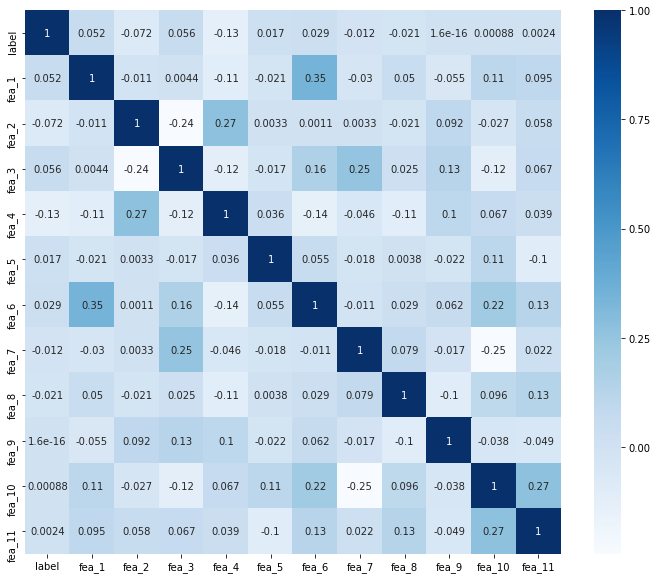

In [13]:
# Построим хитмапу, чтобы посмотреть на корреляции
plt.figure(figsize=(12, 10))  
sns.heatmap(df.corr(), annot=True,cmap ='Blues')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show()

In [14]:
# Обработаем категориальные и числовые признаки
df = pd.get_dummies(df, columns=categorical_cols) # ohe
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])

In [15]:
df.head()

,label,fea_2,fea_4,fea_8,fea_10,fea_11,fea_1_1,fea_1_2,fea_1_4,fea_1_5,...,fea_7_5,fea_7_7,fea_7_8,fea_7_9,fea_7_10,fea_9_1,fea_9_2,fea_9_3,fea_9_4,fea_9_5
0,1,-0.797087,-0.496387,0.684045,-0.087361,0.976754,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,-0.143420,-0.089175,-0.066980,1.161938,0.641174,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.292358,-0.123109,0.016467,-0.607516,-1.190396,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.070533,0.340661,0.767492,-0.685685,-1.190396,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0.000000,-0.699993,0.600597,1.872466,0.554375,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [16]:
df.to_csv('../data/modified_credit_risk.csv', index=False)